<a href="https://colab.research.google.com/github/eriksali/DNN_2023_DL/blob/main/a2_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Result: y = -0.14695233446519113 + -0.5006634382650733 x + -2.7971451471335804 x^2 + 0.07750693781535295 x^3 + 0.3984491433107182 x^4


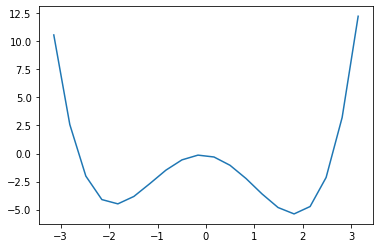

In [ ]:
## Q1
## 
## To build a linear regression model 
##
## learning_rate:     {1e-6, 1e-5, 1e-4}
## polynomial_degree: {2, 3, 4}



import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    



# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x) + np.random.normal(0, 1, 20)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()

learning_rate = 1e-4
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    #y_pred = a + b * x + c * x ** 2
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

    loss = np.square(y_pred - y).sum()

    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    grad_e = (grad_y_pred * x ** 4).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    e -= learning_rate * grad_d

#print(f'Result: y = {a} + {b} x + {c} x^2')
#print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4')

plt.plot(x, y_pred)
plt.show()



In [ ]:
## Q2
## 
## To build the model using the gradient search 
##
## input:   fertilizers and insecticides
## output:  predicted corn yield  

import numpy as np 
from numpy import linalg as LA

X = np.array([[6, 4], [10, 4], [12, 5], [14, 7], [16, 9], [18, 12], [22, 14], [24, 20], [26, 21], [32, 24]])
Y = np.array([40, 44, 46, 48, 52, 58, 60, 68, 74, 80])

alpha = 0.000075
w_old = np.array([-0.5, 0.7])

for i in range (5):
  err = Y - np.matmul(w_old, X.T)
  grad_old = -np.matmul(err, X)
  w_new = w_old - alpha * grad_old
  w_old = w_new

# accept input of space seperated numbers
list = input().split()

for i in range(len(list)):
  list[i] = int(list[i])

arr = np.array(list)

x = np.array([arr])

y_pred = np.matmul(w_old, x.T)
print(y_pred[0])


22 15
59.14763714091853


In [ ]:
## Q3
## 
## The pseudo-inverse approach for the prediction model 
##
## input:   fertilizers and insecticides
## output:  predicted corn yield 

import numpy as np 
from numpy import linalg as LA

X = np.array([[6, 4], [10, 4], [12, 5], [14, 7], [16, 9], [18, 12], [22, 14], [24, 20], [26, 21], [32, 24]])
Y = np.array([40, 44, 46, 48, 52, 58, 60, 68, 74, 80])

B = LA.lstsq(X,Y)

# accept input of space seperated numbers
list = input().split()

for i in range(len(list)):
  list[i] = int(list[i])

arr = np.array(list)

x = np.array([arr])
y_pred = np.matmul(x, B[0])
print(y_pred[0])


<ipython-input-38-787cdfa0f9d8>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = LA.lstsq(X,Y)


22 15
65.91718272028655


In [ ]:
B

(array([ 4.80183541, -2.64821309]),
 array([763.78333209]),
 2,
 array([75.64737694,  6.1216307 ]))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


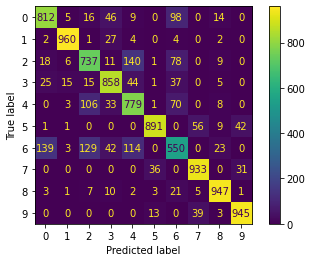

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
## Q4
## 
## To perform a recognition task using logistic regression with sklearn 
##

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import gzip
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'
filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)
with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)


##X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

logi_regr = LogisticRegression(random_state=None)
logi_regr.fit(X_train, y_train)
y_pred = logi_regr.predict(X_test)

# compute accuracy of the model
logi_regr.score(X_test, y_test)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

# Run the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


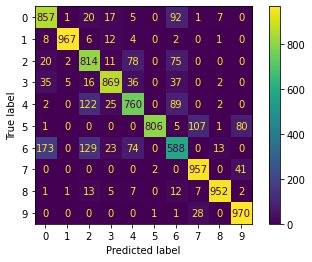

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.76      0.77      1000
           5       1.00      0.81      0.89      1000
           6       0.65      0.59      0.62      1000
           7       0.87      0.96      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [ ]:
## Q5
## 
## To perform a recognition task using k-NN classifier 
##
## k = {3, 5, 7}


import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import gzip
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'
filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)
with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

# train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

# Run the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

